In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install copick git+https://github.com/copick/copick-utils.git git+https://github.com/copick/DeepFindET.git

  Cloning https://github.com/copick/copick-utils.git to /tmp/pip-req-build-5i11eh03
  Running command git clone --filter=blob:none --quiet https://github.com/copick/copick-utils.git /tmp/pip-req-build-5i11eh03
  Resolved https://github.com/copick/copick-utils.git to commit d72192abb2d18dcd0ff8caa749f2327cf24ce894
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/copick/DeepFindET.git to /tmp/pip-req-build-xiwsbs_f
  Running command git clone --filter=blob:none --quiet https://github.com/copick/DeepFindET.git /tmp/pip-req-build-xiwsbs_f
  Resolved https://github.com/copick/DeepFindET.git to commit 15cef0e7a6000ea73df440042a8999812992e57d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setu

In [ ]:
!unzip /content/drive/MyDrive/Colab_Notebooks/CZII/czii-cryo-et-object-identification.zip -d /content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/


Archive:  /content/drive/MyDrive/Colab_Notebooks/CZII/czii-cryo-et-object-identification.zip
   creating: /content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/
  inflating: /content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/__MACOSX/._czii-cryo-et-object-identification  
   creating: /content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/test/
  inflating: /content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/__MACOSX/czii-cryo-et-object-identification/._test  
   creating: /content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/train/
  inflating: /content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/__MACOSX/czii-cryo-et-object-identification/._train  
  inflating: /content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/sample_submission.csv  
  inflating: /content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/__MACOSX/czii-cryo-et-object-identification/._

In [6]:
!pip install zarr
import json
import pandas as pd
from pathlib import Path
import matplotlib
import zarr
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import glob
import cv2
import json

In [9]:
input_dir = Path("/content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/train/overlay/ExperimentRuns")


In [10]:
df_list = []
for experiment_dir_path in input_dir.glob("*"):
    for annotation_path in experiment_dir_path.glob("Picks/*.json"):
        with open(annotation_path, 'r') as file:
            annotation = json.load(file)
            run_name = annotation["run_name"]
            particle_type = annotation["pickable_object_name"]
            for point in annotation["points"]:
                df_list.append({
                    "experiment": run_name,
                    "particle_type": particle_type,
                    "x": point["location"]["x"],
                    "y": point["location"]["y"],
                    "z": point["location"]["z"]
                })

In [11]:
df = pd.DataFrame(df_list)
df.to_csv("/content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/train.csv", index=False)

In [12]:
df.head()

,experiment,particle_type,x,y,z
0,TS_5_4,thyroglobulin,4527.706,221.468,279.908
1,TS_5_4,thyroglobulin,5458.275,3743.418,332.075
2,TS_5_4,thyroglobulin,5086.266,5378.977,411.051
3,TS_5_4,thyroglobulin,2091.242,489.208,433.742
4,TS_5_4,thyroglobulin,4338.644,1822.464,455.595


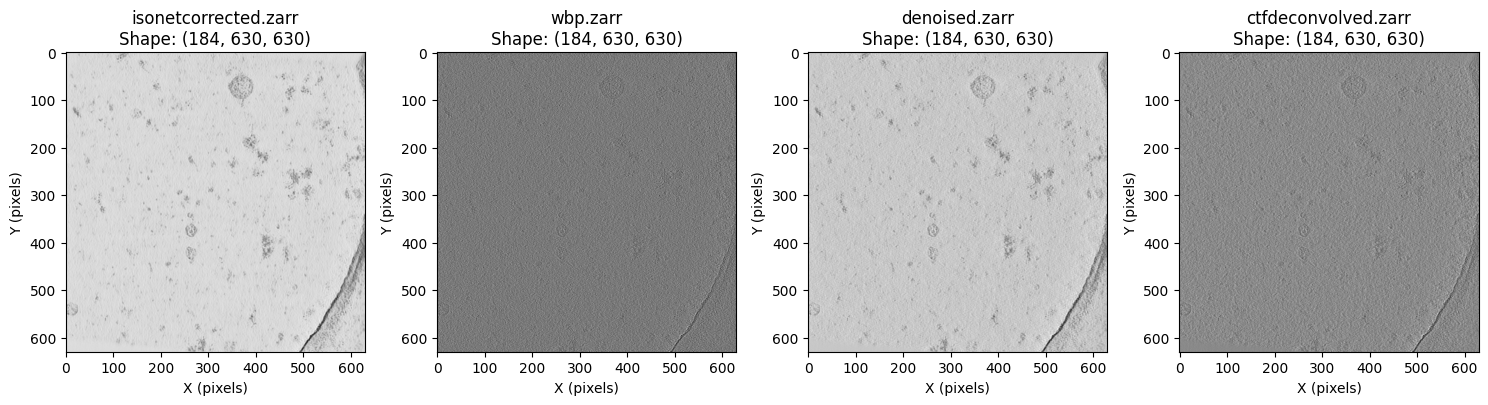

In [21]:


zarr_folder = "/content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000"


zarr_files = [f for f in os.listdir(zarr_folder) if f.endswith(".zarr")]
file_paths = [os.path.join(zarr_folder, f) for f in zarr_files]


fig, axes = plt.subplots(1, len(zarr_files), figsize=(15, 5))

for i, file_path in enumerate(file_paths):
    root = zarr.open(file_path, mode='r')
    file_name = os.path.basename(file_path)

    if '0' in root.keys():
        volume = root['0']
        z_slice_index = volume.shape[0] // 2
        slice_2d = volume[z_slice_index, :, :]


        axes[i].imshow(slice_2d, cmap='gray')
        axes[i].set_title(f"{file_name}\nShape: {volume.shape}")
        axes[i].set_xlabel("X (pixels)")
        axes[i].set_ylabel("Y (pixels)")
    else:
        axes[i].set_title(f"{file_name}\nNo key '0'")
        axes[i].axis('off')

plt.tight_layout()
plt.show()


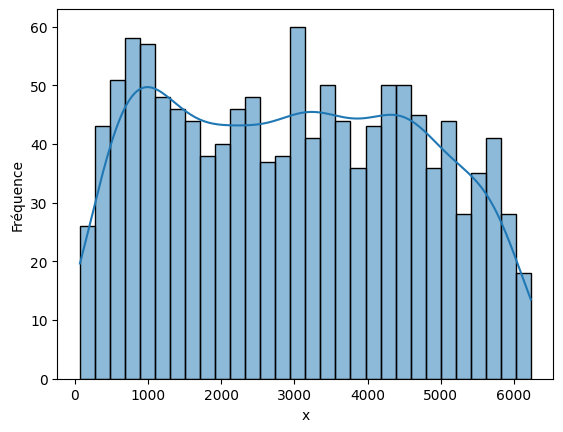

In [21]:

column_name = 'x'
sns.histplot(df[column_name], kde=True, bins=30)

plt.xlabel(column_name)
plt.ylabel("Fréquence")


plt.show()

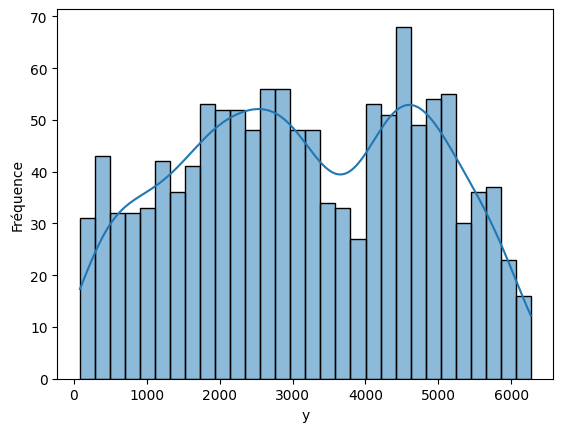

In [22]:

column_name = 'y'
sns.histplot(df[column_name], kde=True, bins=30)

plt.xlabel(column_name)
plt.ylabel("Fréquence")


plt.show()

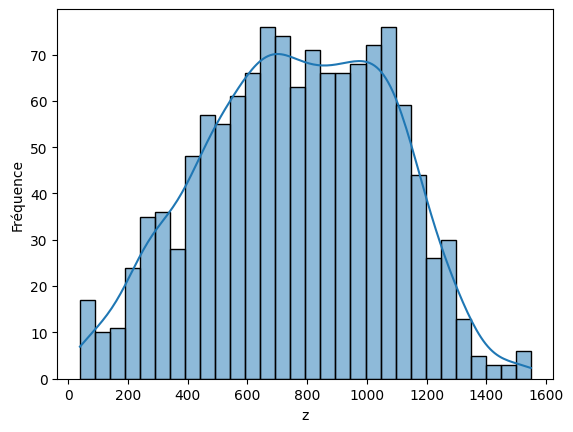

In [23]:

column_name = 'z'
sns.histplot(df[column_name], kde=True, bins=30)

plt.xlabel(column_name)
plt.ylabel("Fréquence")


plt.show()

<ipython-input-25-f991c1851b7a>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = {particle_type: cm.get_cmap('tab10')(i / len(particle_types)) for i, particle_type in enumerate(particle_types)}


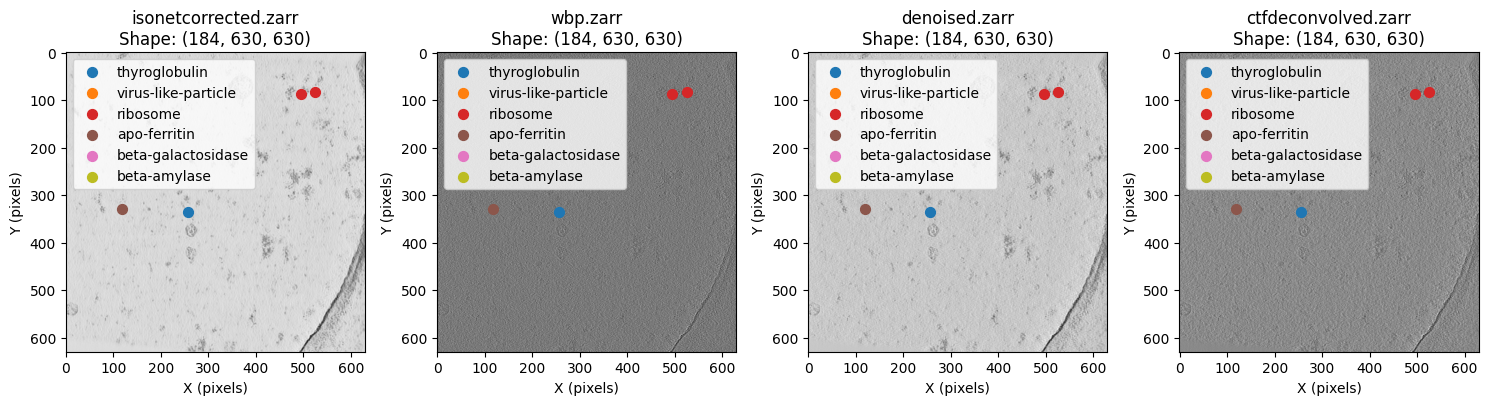

In [25]:

zarr_folder = "/content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000"
zarr_files = [f for f in os.listdir(zarr_folder) if f.endswith(".zarr")]
file_paths = [os.path.join(zarr_folder, f) for f in zarr_files]

experiment = "TS_5_4"
filtered_df = df[df["experiment"] == experiment]

particle_types = filtered_df["particle_type"].unique()
colors = {particle_type: cm.get_cmap('tab10')(i / len(particle_types)) for i, particle_type in enumerate(particle_types)}

fig, axes = plt.subplots(1, len(zarr_files), figsize=(15, 5))

for i, file_path in enumerate(file_paths):
    root = zarr.open(file_path, mode='r')
    file_name = os.path.basename(file_path)

    if '0' in root.keys():
        volume = root['0']
        z_slice_index = volume.shape[0] // 2
        slice_2d = volume[z_slice_index, :, :]

        axes[i].imshow(slice_2d, cmap='gray')
        axes[i].set_title(f"{file_name}\nShape: {volume.shape}")
        axes[i].set_xlabel("X (pixels)")
        axes[i].set_ylabel("Y (pixels)")

        for particle_type, color in colors.items():
            particle_data = filtered_df[filtered_df["particle_type"] == particle_type].copy()


            particle_data.loc[:, "x_scaled"] = particle_data["x"] * (volume.shape[2] / 6000)
            particle_data.loc[:, "y_scaled"] = particle_data["y"] * (volume.shape[1] / 6000)
            particle_data.loc[:, "z_scaled"] = particle_data["z"] * (volume.shape[0] / 1600)


            points_in_slice = particle_data[
                (particle_data["z_scaled"] >= z_slice_index - 1) & (particle_data["z_scaled"] <= z_slice_index + 1)
            ]

            axes[i].scatter(points_in_slice["x_scaled"], points_in_slice["y_scaled"], color=color, label=particle_type, s=50)

    axes[i].legend()

plt.tight_layout()
plt.show()

transformer mes images 3D en images 2D

In [28]:
experiences = glob.glob('/content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/train/static/ExperimentRuns/*')
experiences

['/content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_5_4',
 '/content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_99_9',
 '/content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_6_4',
 '/content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_73_6',
 '/content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_86_3',
 '/content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_6_6',
 '/content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_69_2']

In [13]:
runs = glob.glob('/content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/*')
runs

['/content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/isonetcorrected.zarr',
 '/content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/wbp.zarr',
 '/content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/denoised.zarr',
 '/content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/ctfdeconvolved.zarr']

In [14]:
ison_data = zarr.open(runs[0], mode='r')
print(ison_data.info)

Name        : /
Type        : zarr.hierarchy.Group
Read-only   : True
Store type  : zarr.storage.DirectoryStore
No. members : 3
No. arrays  : 3
No. groups  : 0
Arrays      : 0, 1, 2



In [18]:
array_0 = ison_data['0']

print(array_0.info)
print("Shape:", array_0.shape)
print("Data type:", array_0.dtype)


Name               : /0
Type               : zarr.core.Array
Data type          : float32
Shape              : (184, 630, 630)
Chunk shape        : (256, 256, 256)
Order              : C
Read-only          : True
Compressor         : Blosc(cname='lz4', clevel=5, shuffle=SHUFFLE, blocksize=0)
Store type         : zarr.storage.DirectoryStore
No. bytes          : 292118400 (278.6M)
No. bytes stored   : 399
Storage ratio      : 732126.3
Chunks initialized : 1/9

Shape: (184, 630, 630)
Data type: float32


In [23]:
array_0[0,0,0]

-0.045043502

In [19]:
for z_slice in range(array_0.shape[0]):
    slice_2d = array_0[z_slice, :, :]

In [27]:
slice_2d

array([[-0.11513712, -0.1097955 , -0.05748374, ..., -0.25218552,
        -0.20745727, -0.21535483],
       [-0.11662012, -0.06139074, -0.02838215, ..., -0.2287188 ,
        -0.22163646, -0.23593901],
       [-0.10774288, -0.00852448, -0.04168166, ..., -0.19527242,
        -0.26348922, -0.29371968],
       ...,
       [-0.11373765, -0.08833109, -0.09065019, ..., -0.4929111 ,
        -0.42259288, -0.27406317],
       [-0.13195674, -0.08904393, -0.1213987 , ..., -0.4494411 ,
        -0.44834006, -0.30772474],
       [-0.12202264, -0.1180367 , -0.1386629 , ..., -0.41168728,
        -0.4361696 , -0.32412955]], dtype=float32)

In [29]:
from PIL import Image
import os
import zarr
import glob

base_path = "/content/drive/MyDrive/Colab_Notebooks/CZII/czi_data/czii-cryo-et-object-identification/train/static"
experiments_path = os.path.join(base_path, "ExperimentRuns")
output_base_path = os.path.join(base_path, "Slices2D")

os.makedirs(output_base_path, exist_ok=True)

experiences = glob.glob(os.path.join(experiments_path, "*"))

for experience in experiences:
    experience_name = os.path.basename(experience)
    runs = glob.glob(os.path.join(experience, "VoxelSpacing10.000", "*"))

    for run in runs:
        run_name = os.path.basename(run)
        ison_data = zarr.open(run, mode='r')
        array_0 = ison_data['0']
        run_output_dir = os.path.join(output_base_path, experience_name, run_name)
        os.makedirs(run_output_dir, exist_ok=True)

        for z_slice in range(array_0.shape[0]):
            slice_2d = array_0[z_slice, :, :]
            slice_2d = (slice_2d - slice_2d.min()) / (slice_2d.max() - slice_2d.min() + 1e-12) * 255
            slice_2d = slice_2d.astype("uint8")
            output_path = os.path.join(run_output_dir, f"slice_{z_slice:03d}.png")
            Image.fromarray(slice_2d).save(output_path)
